In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
import math
from PIL import Image
import os

In [2]:
# path = "D:\\UTE\\UTE_Nam_4_ki_2_DATN\\Thu_Thap_Data\\Final_chessboard_ver4\\0704_143421_862_IH.jpg"
path = "D:\\UTE\\UTE_Nam_4_ki_2_DATN\\Thu_Thap_Data\\Final_chessboard_ver4\\0704_143436_217_SQ.jpg"
# path = 'Data_ver2_Banhpia\\Data_tho\\0610_132140_CW.jpg'
# path2 = 'World_coordinate/2025-05-12_10-28-08.jpg'

In [3]:
# Đọc ảnh
image = cv2.imread(path)
if image is None:
    print("Không tìm thấy ảnh!")
    exit()

(480, 640, 3)


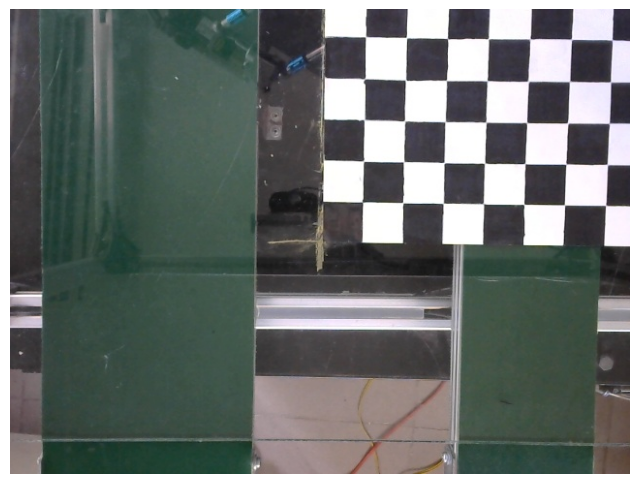

In [4]:
print(image.shape)
# Hiển thị ảnh kết quả bằng matplotlib (chuyển ảnh từ BGR sang RGB)
plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

Phát hiện thành công bàn cờ.


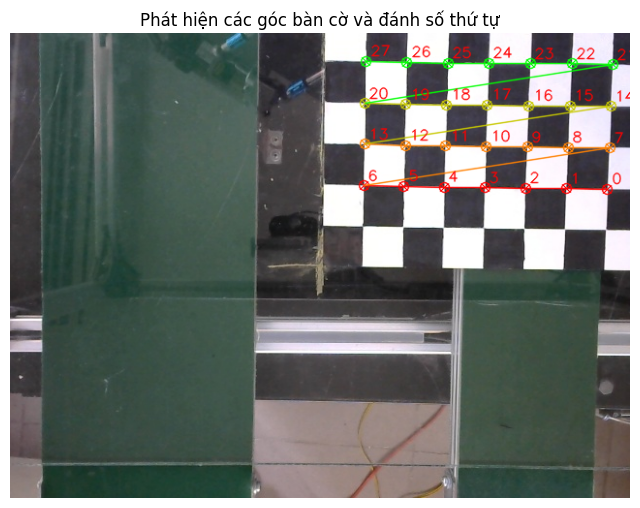

In [5]:
# Kích thước lưới bàn cờ (số góc bên trong, không phải số ô)
pattern_size = (7,4)  # ví dụ: bàn cờ 8x8 ô thì có 7x7 giao điểm

# Chuyển sang ảnh xám
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Tìm các góc bàn cờ
ret, corners = cv2.findChessboardCorners(gray, pattern_size, None)

if ret:
    # Cải thiện độ chính xác của góc
    corners2 = cv2.cornerSubPix(
        gray, corners, winSize=(11, 11), zeroZone=(-1, -1),
        criteria=(cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
    )

    # Vẽ các góc
    cv2.drawChessboardCorners(image, pattern_size, corners2, ret)

    # Đánh số thứ tự các góc
    for i, corner in enumerate(corners2):
        x, y = corner.ravel()
        # Vẽ số thứ tự lên ảnh, dùng font nhỏ để dễ quan sát
        cv2.putText(image, str(i), (int(x) + 5, int(y) - 5),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)

    print("Phát hiện thành công bàn cờ.")
else:
    print("Không phát hiện được bàn cờ.")

# Hiển thị ảnh kết quả bằng matplotlib (chuyển ảnh từ BGR sang RGB)
plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Phát hiện các góc bàn cờ và đánh số thứ tự")
plt.axis('off')
plt.show()

In [7]:
"""
Trục tọa độ pixel trong ảnh:
(0,0) ──────► x (width)
  │
  │
  ▼
  y (height)

"""

'\nTrục tọa độ pixel trong ảnh:\n(0,0) ──────► x (width)\n  │\n  │\n  ▼\n  y (height)\n\n'

In [6]:
def generate_world_coordinates():
    """
    Tính toán tọa độ các điểm từ 0 đến 27 theo pattern:
    - Điểm 0: (2.9, -20.3)
    - Điểm 1: (2.9, -17.4)
    - Điểm 6: (2.9, -2.9)
    - Điểm 7: (5.8, -20.3)
    - Điểm 27: (11.6, -2.9)
   
    Returns:
        world_coords (ndarray): mảng (28, 2) chứa tọa độ các điểm từ 0 đến 27
    """
    world_coords = []
   
    # Thông số cơ bản
    square_size = 2.9  # khoảng cách giữa các điểm
    num_cols = 7  # số cột (từ điểm 0-6, 7-13, 14-20, 21-27)
    num_rows = 4  # số hàng (thay đổi từ 5 thành 4)
   
    # Tọa độ điểm gốc (điểm 0)
    start_x = 2.9
    start_y = -20.3
   
    # Tạo 28 điểm (từ 0 đến 27)
    for point_idx in range(28):
        # Tính hàng và cột từ chỉ số điểm
        row = point_idx // num_cols  # hàng (0-3)
        col = point_idx % num_cols   # cột (0-6)
       
        # Tính tọa độ
        x = start_x + row * square_size + start_x 
        y = start_y + col * square_size      # Y tăng dần theo cột
       
        world_coords.append([x, y])
   
    return np.array(world_coords, dtype=np.float32)

In [7]:
# square_size = 2.9      # cm
# num_corners_x = 8     # 8 góc ngang
# num_corners_y = 5     # 5 góc dọc
# rotation_angle = 270  # độ, quay theo chiều kim đồng hồ

# coords = generate_world_coordinates(square_size, num_corners_x, num_corners_y)
coords = generate_world_coordinates()
print(coords[0:40])  # in ra 5 tọa độ đầu tiên


[[  5.8 -20.3]
 [  5.8 -17.4]
 [  5.8 -14.5]
 [  5.8 -11.6]
 [  5.8  -8.7]
 [  5.8  -5.8]
 [  5.8  -2.9]
 [  8.7 -20.3]
 [  8.7 -17.4]
 [  8.7 -14.5]
 [  8.7 -11.6]
 [  8.7  -8.7]
 [  8.7  -5.8]
 [  8.7  -2.9]
 [ 11.6 -20.3]
 [ 11.6 -17.4]
 [ 11.6 -14.5]
 [ 11.6 -11.6]
 [ 11.6  -8.7]
 [ 11.6  -5.8]
 [ 11.6  -2.9]
 [ 14.5 -20.3]
 [ 14.5 -17.4]
 [ 14.5 -14.5]
 [ 14.5 -11.6]
 [ 14.5  -8.7]
 [ 14.5  -5.8]
 [ 14.5  -2.9]]


In [ ]:
# Đảm bảo cả 2 đều là np.float32
image_points = np.array(corners2, dtype=np.float32)
world_points = np.array(coords, dtype=np.float32)

# Tính ma trận homography
H, status = cv2.findHomography(world_points, image_points)

print("\nMa trận homography H:")
print(H)

In [ ]:
np.save('homography_matrix.npy', H)

# H_loaded = np.load('homography_matrix.npy')

NameError: name 'H' is not defined

In [4]:
H_loaded = np.load('homography_matrix.npy')
H = H_loaded
print(H_loaded)

[[-2.87330183e-01 -1.40499158e+01  3.21960053e+02]
 [-1.46061122e+01 -1.37659830e-01  2.40031709e+02]
 [-1.52199693e-03  4.17864595e-04  1.00000000e+00]]


In [5]:
# Thử ánh xạ một điểm
point_world = np.array([15, 15*2, 1], dtype=np.float32)  # (x, y, 1)
point_image = H @ point_world
point_image /= point_image[2]  # chuẩn hóa về (x, y, 1)

print("\nTọa độ điểm (2,2) trong ảnh:", point_image[:2])


Tọa độ điểm (2,2) trong ảnh: [-104.92749828   16.98507534]


In [6]:
def pixel_to_world(x_pixel, y_pixel, H):
    # Đảo ngược ma trận H để có được H_inverse (thế giới thực -> ảnh)
    H_inverse = np.linalg.inv(H)
    
    # Tạo điểm pixel dạng homogeneous
    point_pixel = np.array([x_pixel, y_pixel, 1], dtype=np.float32)
    
    # Áp dụng H_inverse để có tọa độ thực
    point_world = H_inverse @ point_pixel
    
    # Chuẩn hóa tọa độ
    point_world /= point_world[2]
    
    # Trả về tọa độ x, y trong thế giới thực
    return point_world[:2]

# Hàm để người dùng chọn điểm trên ảnh
def select_point_on_image(image_path, H):
    # Đọc ảnh
    image = cv2.imread(image_path)
    if image is None:
        print(f"Không thể đọc ảnh từ {image_path}")
        return
    
    # Tạo một bản sao để vẽ lên
    display_img = image.copy()
    
    # Biến lưu điểm đã chọn
    selected_points = []
    
    # Hàm callback cho sự kiện chuột
    def mouse_callback(event, x, y, flags, param):
        if event == cv2.EVENT_LBUTTONDOWN:
            # Vẽ điểm được chọn
            cv2.circle(display_img, (x, y), 5, (0, 0, 255), -1)
            
            # Tính tọa độ thế giới thực
            world_x, world_y = pixel_to_world(x, y, H)
            
            print(f"Điểm pixel ({x}, {y}) -> Tọa độ thực: ({world_x:.2f}, {world_y:.2f})")
            
            # Hiển thị tọa độ trên ảnh
            cv2.putText(display_img, f"({world_x:.2f}, {world_y:.2f})", (x+10, y), 
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)
            
            selected_points.append((x, y, world_x, world_y))
            
            # Cập nhật hiển thị
            cv2.imshow("Chọn điểm", display_img)
    
    # Tạo cửa sổ và thiết lập callback
    cv2.namedWindow("Chọn điểm")
    cv2.setMouseCallback("Chọn điểm", mouse_callback)
    
    print("Nhấp chuột trái để chọn điểm trên ảnh. Nhấn 'q' để thoát.")
    
    # Hiển thị ảnh và chờ người dùng tương tác
    cv2.imshow("Chọn điểm", image)
    while True:
        key = cv2.waitKey(1) & 0xFF
        if key == ord('q'):
            break
    
    cv2.destroyAllWindows()
    return selected_points

In [8]:
# Hoặc sử dụng GUI để chọn điểm
selected_points = select_point_on_image(path, H)

Nhấp chuột trái để chọn điểm trên ảnh. Nhấn 'q' để thoát.
Điểm pixel (466, 226) -> Tọa độ thực: (1.15, -10.08)
Điểm pixel (526, 299) -> Tọa độ thực: (-3.90, -14.44)


KeyboardInterrupt: 

In [18]:
def calculate_homography_accuracy(H, image_points, world_points):
    """
    Tính độ chính xác của ma trận homography
    
    Args:
        H: Ma trận homography (3x3)
        image_points: Tọa độ điểm trên ảnh (N, 2) hoặc (N, 1, 2)
        world_points: Tọa độ điểm trong world (N, 2) hoặc (N, 1, 2)
    
    Returns:
        accuracy_metrics: dict chứa các thông số độ chính xác
    """
    import numpy as np
    
    # Reshape image_points và world_points về dạng (N, 2) nếu cần
    if image_points.ndim == 3:
        image_points = image_points.reshape(-1, 2)
    if world_points.ndim == 3:
        world_points = world_points.reshape(-1, 2)
    
    # Chuyển đổi từ image points sang world points sử dụng ma trận nghịch đảo
    H_inv = np.linalg.inv(H)
    
    # Chuyển image points thành tọa độ đồng nhất
    image_points_homogeneous = np.hstack([image_points, np.ones((image_points.shape[0], 1))])
    
    # Chuyển đổi từ image sang world
    world_points_transformed = []
    for point in image_points_homogeneous:
        transformed = H_inv @ point
        # Chuyển về tọa độ Cartesian
        world_points_transformed.append([transformed[0]/transformed[2], transformed[1]/transformed[2]])
    
    world_points_transformed = np.array(world_points_transformed)
    
    # Tính sai số giữa world points thực tế và world points được chuyển đổi
    errors = np.linalg.norm(world_points - world_points_transformed, axis=1)
    
    # Tính các thông số thống kê
    mean_error = np.mean(errors)
    std_error = np.std(errors)
    max_error = np.max(errors)
    min_error = np.min(errors)
    rmse = np.sqrt(np.mean(errors**2))
    
    # Tính sai số giữa các world points với nhau (consistency check)
    inter_point_errors = []
    for i in range(len(world_points)):
        for j in range(i+1, len(world_points)):
            # Khoảng cách thực tế
            actual_distance = np.linalg.norm(world_points[i] - world_points[j])
            # Khoảng cách được chuyển đổi
            transformed_distance = np.linalg.norm(world_points_transformed[i] - world_points_transformed[j])
            # Sai số khoảng cách
            distance_error = abs(actual_distance - transformed_distance)
            inter_point_errors.append(distance_error)
    
    inter_point_errors = np.array(inter_point_errors)
    mean_inter_error = np.mean(inter_point_errors)
    
    # Tạo dictionary kết quả
    accuracy_metrics = {
        'mean_error': mean_error,
        'std_error': std_error,
        'max_error': max_error,
        'min_error': min_error,
        'rmse': rmse,
        'mean_inter_point_error': mean_inter_error,
        'individual_errors': errors,
        'inter_point_errors': inter_point_errors
    }
    
    # In kết quả
    print(f"Độ chính xác ma trận homography:")
    print(f"- Sai số trung bình: {mean_error:.4f}")
    print(f"- Độ lệch chuẩn: {std_error:.4f}")
    print(f"- Sai số lớn nhất: {max_error:.4f}")
    print(f"- Sai số nhỏ nhất: {min_error:.4f}")
    print(f"- RMSE: {rmse:.4f}")
    print(f"- Sai số trung bình giữa các điểm: {mean_inter_error:.4f}")
    
    return accuracy_metrics

In [19]:
image_points.shape

(28, 1, 2)

In [20]:
calculate_homography_accuracy(H, image_points, world_points)

Độ chính xác ma trận homography:
- Sai số trung bình: 0.0216
- Độ lệch chuẩn: 0.0100
- Sai số lớn nhất: 0.0468
- Sai số nhỏ nhất: 0.0077
- RMSE: 0.0238
- Sai số trung bình giữa các điểm: 0.0185


{'mean_error': 0.02162440543760311,
 'std_error': 0.01004627257580452,
 'max_error': 0.04682906335850829,
 'min_error': 0.007734119210582412,
 'rmse': 0.02384412932352953,
 'mean_inter_point_error': 0.018536031787991573,
 'individual_errors': array([0.03059055, 0.0220716 , 0.01764472, 0.02080565, 0.01372862,
        0.01258182, 0.0088431 , 0.03691229, 0.00773412, 0.0169398 ,
        0.01726779, 0.02379586, 0.01673683, 0.03830827, 0.01558731,
        0.01276407, 0.01682923, 0.01424648, 0.0182082 , 0.04097585,
        0.03559753, 0.02970048, 0.02281572, 0.01334669, 0.01692291,
        0.02455639, 0.01314241, 0.04682906]),
 'inter_point_errors': array([2.97818575e-02, 3.55947625e-02, 3.55563752e-02, 2.71022407e-02,
        1.60280344e-02, 1.16611862e-02, 6.45603587e-03, 7.63596577e-03,
        5.21132574e-03, 3.76254193e-03, 1.33559838e-02, 2.09947034e-03,
        1.12248503e-02, 2.50141424e-02, 6.81859498e-03, 1.80762858e-02,
        1.22761051e-02, 3.98656228e-03, 1.75766180e-02, 4.5729

In [25]:
def compute_reprojection_error(H, world_points, image_points):
    """
    Tính sai số tái tạo giữa điểm ảnh thật và điểm dự đoán qua homography.

    Args:
        H (ndarray): ma trận homography 3x3
        world_points (ndarray): các điểm thực (N, 2)
        image_points (ndarray): các điểm góc ảnh (N, 2) hoặc (N, 1, 2)

    Returns:
        error (float): sai số trung bình (mean reprojection error)
    """
    if image_points.ndim == 3:
        image_points = image_points.reshape(-1, 2)

    # Thêm chiều thứ 3 để chuyển sang hệ tọa độ đồng nhất
    world_points_h = np.hstack((world_points, np.ones((world_points.shape[0], 1))))

    # Chiếu điểm bằng homography
    projected = (H @ world_points_h.T).T
    projected /= projected[:, 2].reshape(-1, 1)  # chuẩn hóa để có (x, y)

    projected_points = projected[:, :2]

    # Tính sai số Euclidean giữa điểm ảnh thật và điểm dự đoán
    errors = np.linalg.norm(projected_points - image_points, axis=1)

    mean_error = np.mean(errors)
    return mean_error

In [7]:
error = compute_reprojection_error(H, world_points, image_points)
print(f"Sai số tái tạo trung bình: {error:.2f} pixels")

NameError: name 'compute_reprojection_error' is not defined

In [20]:
import numpy as np

def compute_average_mm_per_pixel(H, world_points, image_points):
    """
    Tính trung bình tỷ lệ mm/pixel từ tập điểm thực và điểm ảnh tương ứng.

    Args:
        H (ndarray): Ma trận homography 3x3.
        world_points (ndarray): Các điểm thực (N, 2) – đơn vị mm.
        image_points (ndarray): Các điểm ảnh tương ứng (N, 2) – đơn vị pixel.

    Returns:
        average_mm_per_pixel (float): tỷ lệ mm/pixel trung bình.
    """
    if image_points.ndim == 3:
        image_points = image_points.reshape(-1, 2)

    assert world_points.shape == image_points.shape, "Hai mảng phải cùng kích thước."

    # Chuyển world_points sang tọa độ đồng nhất để chiếu bằng H
    world_points_h = np.hstack((world_points, np.ones((world_points.shape[0], 1))))

    # Chiếu điểm thực sang ảnh
    projected_pixels = (H @ world_points_h.T).T
    projected_pixels /= projected_pixels[:, 2].reshape(-1, 1)
    projected_pixels = projected_pixels[:, :2]

    # Tính khoảng cách thực và khoảng cách ảnh cho từng cặp điểm
    pixel_distances = []
    real_distances = []

    for i in range(len(image_points) - 1):
        dpixel = np.linalg.norm(projected_pixels[i] - projected_pixels[i + 1])
        dreal = np.linalg.norm(world_points[i] - world_points[i + 1])
        if dpixel > 0:  # tránh chia cho 0
            pixel_distances.append(dpixel)
            real_distances.append(dreal)

    # Tính tỷ lệ mm/pixel cho từng cặp
    ratios = [r / p for r, p in zip(real_distances, pixel_distances)]
    average_ratio = np.mean(ratios)

    return average_ratio


In [21]:
world_points

array([[ 14.5,  -2.9],
       [ 14.5,  -5.8],
       [ 14.5,  -8.7],
       [ 14.5, -11.6],
       [ 14.5, -14.5],
       [ 14.5, -17.4],
       [ 11.6,  -2.9],
       [ 11.6,  -5.8],
       [ 11.6,  -8.7],
       [ 11.6, -11.6],
       [ 11.6, -14.5],
       [ 11.6, -17.4],
       [  8.7,  -2.9],
       [  8.7,  -5.8],
       [  8.7,  -8.7],
       [  8.7, -11.6],
       [  8.7, -14.5],
       [  8.7, -17.4],
       [  5.8,  -2.9],
       [  5.8,  -5.8],
       [  5.8,  -8.7],
       [  5.8, -11.6],
       [  5.8, -14.5],
       [  5.8, -17.4]], dtype=float32)

In [22]:
import numpy as np
import cv2

def calculate_mm_per_pixel_from_chessboard(corners, square_size_mm, pattern_size):
    """
    Tính tỉ lệ mm/pixel từ bàn cờ
    
    Args:
        corners: các góc phát hiện được (từ cv2.findChessboardCorners)
        square_size_mm: kích thước ô vuông thực tế (mm)
        pattern_size: (width, height) - số góc trong bàn cờ
    
    Returns:
        mm_per_pixel: tỉ lệ chuyển đổi trung bình
    """
    
    # Chuyển từ cm sang mm
    square_size_mm = square_size_mm * 10  # 2.9cm = 29mm
    
    corners = corners.reshape(-1, 2)
    
    # Tính khoảng cách pixel giữa các góc liền kề
    pixel_distances = []
    
    # Khoảng cách ngang (giữa các góc cùng hàng)
    for row in range(pattern_size[1]):  # 4 hàng
        for col in range(pattern_size[0] - 1):  # 5 cặp mỗi hàng
            idx1 = row * pattern_size[0] + col
            idx2 = row * pattern_size[0] + col + 1
            
            distance = np.sqrt((corners[idx1][0] - corners[idx2][0])**2 + 
                             (corners[idx1][1] - corners[idx2][1])**2)
            pixel_distances.append(distance)
    
    # Khoảng cách dọc (giữa các góc cùng cột)
    for col in range(pattern_size[0]):  # 6 cột
        for row in range(pattern_size[1] - 1):  # 3 cặp mỗi cột
            idx1 = row * pattern_size[0] + col
            idx2 = (row + 1) * pattern_size[0] + col
            
            distance = np.sqrt((corners[idx1][0] - corners[idx2][0])**2 + 
                             (corners[idx1][1] - corners[idx2][1])**2)
            pixel_distances.append(distance)
    
    # Tính trung bình khoảng cách pixel
    avg_pixel_distance = np.mean(pixel_distances)
    
    # Tỉ lệ chuyển đổi
    mm_per_pixel = square_size_mm / avg_pixel_distance
    
    print(f"Kích thước ô vuông: {square_size_mm} mm")
    print(f"Khoảng cách pixel trung bình: {avg_pixel_distance:.2f} pixel")
    print(f"Tỉ lệ chuyển đổi: {mm_per_pixel:.4f} mm/pixel")
    print(f"Hoặc: {1/mm_per_pixel:.2f} pixel/mm")
    
    return mm_per_pixel

# Sử dụng với dữ liệu của bạn
square_size_mm = 2.9 * 10  # 29 mm
pattern_size = (6, 4)

mm_per_pixel = calculate_mm_per_pixel_from_chessboard(
    corners2, square_size_mm/10, pattern_size  # chia 10 vì hàm sẽ nhân lại
)

Kích thước ô vuông: 29.0 mm
Khoảng cách pixel trung bình: 43.14 pixel
Tỉ lệ chuyển đổi: 0.6722 mm/pixel
Hoặc: 1.49 pixel/mm


In [23]:
def calculate_mm_per_pixel_from_chessboard(corners, square_size_mm, pattern_size):
    """
    Tính tỉ lệ mm/pixel từ bàn cờ
    
    Args:
        corners: các góc phát hiện được (từ cv2.findChessboardCorners)
        square_size_mm: kích thước ô vuông thực tế (mm)
        pattern_size: (width, height) - số góc trong bàn cờ
    
    Returns:
        mm_per_pixel: tỉ lệ chuyển đổi trung bình
    """
    
    corners = corners.reshape(-1, 2)
    
    # Tính khoảng cách pixel giữa các góc liền kề
    pixel_distances = []
    
    # Khoảng cách ngang (giữa các góc cùng hàng)
    for row in range(pattern_size[1]):  # 4 hàng
        for col in range(pattern_size[0] - 1):  # 5 cặp mỗi hàng
            idx1 = row * pattern_size[0] + col
            idx2 = row * pattern_size[0] + col + 1
            
            distance = np.sqrt((corners[idx1][0] - corners[idx2][0])**2 + 
                             (corners[idx1][1] - corners[idx2][1])**2)
            pixel_distances.append(distance)
    
    # Khoảng cách dọc (giữa các góc cùng cột)
    for col in range(pattern_size[0]):  # 6 cột
        for row in range(pattern_size[1] - 1):  # 3 cặp mỗi cột
            idx1 = row * pattern_size[0] + col
            idx2 = (row + 1) * pattern_size[0] + col
            
            distance = np.sqrt((corners[idx1][0] - corners[idx2][0])**2 + 
                             (corners[idx1][1] - corners[idx2][1])**2)
            pixel_distances.append(distance)
    
    # Tính trung bình khoảng cách pixel
    avg_pixel_distance = np.mean(pixel_distances)
    std_pixel_distance = np.std(pixel_distances)
    
    # Tỉ lệ chuyển đổi
    mm_per_pixel = square_size_mm / avg_pixel_distance
    
    print(f"Kích thước ô vuông: {square_size_mm} mm")
    print(f"Khoảng cách pixel trung bình: {avg_pixel_distance:.2f} ± {std_pixel_distance:.2f} pixel")
    print(f"Tỉ lệ chuyển đổi: {mm_per_pixel:.4f} mm/pixel")
    print(f"Hoặc: {1/mm_per_pixel:.2f} pixel/mm")
    
    return mm_per_pixel, avg_pixel_distance, std_pixel_distance

def calculate_scale_from_homography(H, world_points, image_points):
    """
    Tính tỉ lệ mm/pixel từ ma trận homography
    """
    # Kiểm tra và chuẩn hóa dữ liệu
    print("Đang kiểm tra dữ liệu...")
    print(f"World points shape: {world_points.shape}")
    print(f"Image points shape: {image_points.shape}")
    
    # Chuẩn hóa image_points nếu cần
    if len(image_points.shape) == 3:
        image_points = image_points.reshape(-1, 2)
    elif len(image_points.shape) == 2 and image_points.shape[1] != 2:
        image_points = image_points.reshape(-1, 2)
    
    # Đảm bảo cả hai có cùng số điểm
    min_points = min(len(world_points), len(image_points))
    world_points = world_points[:min_points]
    image_points = image_points[:min_points]
    
    print(f"Số điểm sử dụng: {min_points}")
    
    if min_points < 2:
        print("Không đủ điểm để tính scale!")
        return None, None
    
    scales = []
    
    # Tính scale giữa các cặp điểm liền kề
    for i in range(min_points - 1):
        # Khoảng cách thực tế (đã có đơn vị cm, chuyển sang mm)
        real_dist = np.sqrt((world_points[i+1][0] - world_points[i][0])**2 + 
                           (world_points[i+1][1] - world_points[i][1])**2) * 10  # cm -> mm
        
        # Khoảng cách trong ảnh
        pixel_dist = np.sqrt((image_points[i+1][0] - image_points[i][0])**2 + 
                            (image_points[i+1][1] - image_points[i][1])**2)
        
        if pixel_dist > 0 and real_dist > 0:  # Tránh chia cho 0
            scale = real_dist / pixel_dist
            scales.append(scale)
            print(f"Điểm {i}-{i+1}: Real={real_dist:.2f}mm, Pixel={pixel_dist:.2f}px, Scale={scale:.4f}")
    
    if not scales:
        print("Không tính được scale nào!")
        return None, None
    
    avg_scale = np.mean(scales)
    std_scale = np.std(scales)
    
    print(f"\nTỉ lệ từ Homography: {avg_scale:.4f} ± {std_scale:.4f} mm/pixel")
    print(f"Hoặc: {1/avg_scale:.2f} pixel/mm")
    
    return avg_scale, std_scale

def local_scale_from_homography(H, point_pixel):
    """
    Tính scale cục bộ tại một điểm cụ thể
    """
    x, y = point_pixel
    
    # Tính Jacobian matrix
    denom = (H[2,0]*x + H[2,1]*y + H[2,2])**2
    
    if abs(denom) < 1e-10:
        return None
    
    # Đạo hàm riêng
    dx_du = (H[0,0]*(H[2,1]*y + H[2,2]) - H[2,0]*(H[0,1]*y + H[0,2])) / denom
    dy_dv = (H[1,1]*(H[2,0]*x + H[2,2]) - H[2,1]*(H[1,0]*x + H[1,2])) / denom
    
    # Scale factor (đơn vị của world_points là cm, nên nhân 10 để ra mm)
    scale_x = abs(dx_du) * 10  # mm/pixel
    scale_y = abs(dy_dv) * 10  # mm/pixel
    
    return (scale_x + scale_y) / 2

# Sử dụng với dữ liệu của bạn
# Sử dụng với dữ liệu của bạn
def prepare_data_and_calculate(corners2, world_points, H):
    """
    Chuẩn bị dữ liệu và tính toán tỉ lệ
    """
    print("=== CHUẨN BỊ DỮ LIỆU ===")
    
    # Kiểm tra corners2
    print(f"corners2 shape: {corners2.shape}")
    print(f"corners2 dtype: {corners2.dtype}")
    
    # Chuẩn hóa image_points
    if len(corners2.shape) == 3:
        image_points = corners2.reshape(-1, 2)
    else:
        image_points = corners2.copy()
    
    print(f"image_points shape sau chuẩn hóa: {image_points.shape}")
    print(f"world_points shape: {world_points.shape}")
    
    # Kiểm tra dữ liệu
    print("\n5 điểm đầu tiên:")
    print("Image points:")
    for i in range(min(5, len(image_points))):
        print(f"  {i}: ({image_points[i][0]:.1f}, {image_points[i][1]:.1f})")
    
    print("World points:")
    for i in range(min(5, len(world_points))):
        print(f"  {i}: ({world_points[i][0]:.1f}, {world_points[i][1]:.1f})")
    
    return image_points

# def main():
#     # Thông số bàn cờ
#     square_size_mm = 29  # 2.9 cm = 29 mm
#     pattern_size = (6, 4)
    
#     print("=== TÍNH TỈ LỆ MM/PIXEL TỪ BÀN CỜ ===\n")
    
#     # Cách sử dụng:
#     print("Cách sử dụng:")
#     print("1. Gọi hàm prepare_data_and_calculate() trước để kiểm tra dữ liệu")
#     print("2. Sau đó gọi các hàm tính toán")
#     print()
#     print("Ví dụ:")
#     print("image_points = prepare_data_and_calculate(corners2, world_points, H)")
#     print("mm_per_pixel, _, _ = calculate_mm_per_pixel_from_chessboard(corners2, 29, (6,4))")
#     print("scale_homo, _ = calculate_scale_from_homography(H, world_points, image_points)")
    
#     print("\nLưu ý:")
#     print("- Tỉ lệ có thể thay đổi theo vị trí do perspective distortion")
#     print("- Nên sử dụng giá trị trung bình cho ước lượng tổng thể")
#     print("- Với homography, scale chính xác nhất ở vùng trung tâm")

# if __name__ == "__main__":
    # main()

In [26]:
# Bước 1: Kiểm tra và chuẩn bị dữ liệu
image_points = prepare_data_and_calculate(corners2, world_points, H)

# Bước 2: Tính tỉ lệ từ bàn cờ (phương pháp đơn giản nhất)
mm_per_pixel, avg_dist, std_dist = calculate_mm_per_pixel_from_chessboard(
    corners2, 29, (6, 4)
)

# Bước 3: Tính tỉ lệ từ homography
scale_homo, std_homo = calculate_scale_from_homography(H, world_points, image_points)

# Bước 4: Tính scale cục bộ tại một số điểm
test_points = [
    [320, 240],  # Tâm ảnh
    [160, 120],  # Góc trên trái
    [480, 360],  # Góc dưới phải
]

print("\n=== SCALE CỤC BỘ ===")
for point in test_points:
    scale = local_scale_from_homography(H, point)
    if scale:
        print(f"Điểm {point}: {scale:.4f} mm/pixel")

=== CHUẨN BỊ DỮ LIỆU ===
corners2 shape: (24, 1, 2)
corners2 dtype: float32
image_points shape sau chuẩn hóa: (24, 2)
world_points shape: (24, 2)

5 điểm đầu tiên:
Image points:
  0: (365.5, 19.9)
  1: (408.2, 20.6)
  2: (451.3, 21.9)
  3: (494.1, 22.6)
  4: (537.2, 23.5)
World points:
  0: (14.5, -2.9)
  1: (14.5, -5.8)
  2: (14.5, -8.7)
  3: (14.5, -11.6)
  4: (14.5, -14.5)
Kích thước ô vuông: 29 mm
Khoảng cách pixel trung bình: 43.14 ± 0.32 pixel
Tỉ lệ chuyển đổi: 0.6722 mm/pixel
Hoặc: 1.49 pixel/mm
Đang kiểm tra dữ liệu...
World points shape: (24, 2)
Image points shape: (24, 2)
Số điểm sử dụng: 24
Điểm 0-1: Real=29.00mm, Pixel=42.66px, Scale=0.6797
Điểm 1-2: Real=29.00mm, Pixel=43.14px, Scale=0.6723
Điểm 2-3: Real=29.00mm, Pixel=42.79px, Scale=0.6778
Điểm 3-4: Real=29.00mm, Pixel=43.15px, Scale=0.6721
Điểm 4-5: Real=29.00mm, Pixel=42.50px, Scale=0.6824
Điểm 5-6: Real=147.87mm, Pixel=218.73px, Scale=0.6760
Điểm 6-7: Real=29.00mm, Pixel=43.65px, Scale=0.6644
Điểm 7-8: Real=29.00mm, P